In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
low_memory=False

In [4]:
flights_path = "/content/drive/My Drive/flights.csv"
flights_data = pd.read_csv(flights_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
flights_data['DEPARTURE_DELAY'].max()

1988.0

In [7]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
flights_data.shape

(5819079, 31)

In [9]:
#lets take a segment of this data for now 
flights_seg = flights_data[0:150000]
flights_seg

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2015,1,10,6,EV,4607,N15572,XNA,IAH,1504,...,1735.0,46.0,0,0,NaN,0.0,0.0,0.0,46.0,0.0
149996,2015,1,10,6,WN,4388,N7723E,ATL,DAL,1505,...,1623.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149997,2015,1,10,6,WN,2903,N218WN,ATL,DCA,1505,...,1634.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149998,2015,1,10,6,WN,4519,N436WN,ATL,MCO,1505,...,1627.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  float64
 15  ELAPSED_TIME     

In [11]:
#year column is unneccesary since the data is bounded to 2015 but day and month are important
delay =[]
for row in flights_seg['ARRIVAL_DELAY']:
    if row > 60:
        delay.append(3)
    elif row > 30:
        delay.append(2)
    elif row > 15:
        delay.append(1)
    else:
        delay.append(0)  
flights_seg['delay'] = delay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [12]:
# 0 = On time/ before time/ not more than 15 mins of delay
# 1 = more than 15 mins and less than 30 mins of delay
# 2 = more than 30 mins and less than 1 hr of delay
# 3 = more than an hour of delay
flights_seg.value_counts('delay')

delay
0    104480
1     15460
3     15397
2     14663
dtype: int64

In [13]:
Flight_data_delay =[]
for row in flights_data['ARRIVAL_DELAY']:
    if row > 60:
        Flight_data_delay.append(3)
    elif row > 30:
        Flight_data_delay.append(2)
    elif row > 15:
        Flight_data_delay.append(1)
    else:
        Flight_data_delay.append(0)  


In [14]:
flights_data['Delay'] = Flight_data_delay

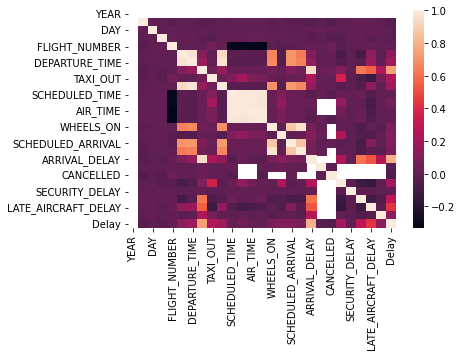

In [15]:
sns.heatmap(flights_data.corr())

In [16]:
flights_data=flights_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                                             axis=1)

In [17]:
flights_data.describe()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
count,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,5.819079e+06
mean,6.524085e+00,1.570459e+01,1.329602e+03,9.370158e+00,1.493808e+03,2.609863e-03,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00,3.394501e-01
std,3.405137e+00,8.783425e+00,4.837518e+02,3.708094e+01,5.071647e+02,5.102012e-02,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01,8.130325e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,9.170000e+02,-5.000000e+00,1.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.325000e+03,-2.000000e+00,1.520000e+03,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,1.730000e+03,7.000000e+00,1.918000e+03,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,2.359000e+03,1.988000e+03,2.400000e+03,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,3.000000e+00


In [18]:
flights_data=flights_data.fillna(flights_data.mean())

In [19]:
flights_data.head(25)

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Delay
0,1,1,5,-11.0,430,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
1,1,1,10,-8.0,750,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
2,1,1,20,-2.0,806,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
3,1,1,20,-5.0,805,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
4,1,1,25,-1.0,320,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
5,1,1,25,-5.0,602,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
6,1,1,25,-6.0,526,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
7,1,1,30,14.0,803,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
8,1,1,30,-11.0,545,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
9,1,1,30,3.0,711,0,13.480568,0.076154,18.969547,23.472838,2.91529,0


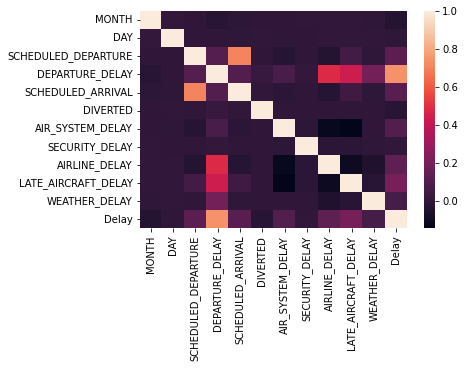

In [20]:
sns.heatmap(flights_data.corr())

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
data = flights_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

### Applying 11 classification algorithms & their comparison

In [25]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 97.5135%
Log Loss: 0.31628906665131595


In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### Plotting confusion matrix for all algorigthms